In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
print('all required library done')

all required library done


In [2]:
train = pd.read_excel('adult dataset_income.xlsx',engine='openpyxl')
test = pd.read_excel('test_adult dataset.xlsx',engine='openpyxl')

In [32]:
train.shape

(32561, 15)

In [33]:
test.shape

(16281, 15)

In [3]:
for column in test.columns : 
    print('----------------------------',column,'-------------------------------')
    print(test[column].unique())


---------------------------- age -------------------------------
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]
---------------------------- workclass -------------------------------
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
---------------------------- fnlwgt -------------------------------
[226802  89814 336951 ... 349230 321403  83891]
---------------------------- education -------------------------------
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
---------------------------- education-num -------------------------------
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
--------------

In [4]:
for column in test.columns : 
    if test[column].dtypes == 'object' : 
        test[column] = test[column].apply(lambda x : x.strip())
    

In [5]:
test['class(target'] = test['class(target'].str.replace('.','')

In [6]:
test['class(target']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: class(target, Length: 16281, dtype: object

In [7]:
joined_df = pd.concat([train,test])

In [8]:

for column in joined_df.columns : 
    print('----------------------------',column,'-------------------------------')
    print(joined_df[column].unique())


---------------------------- age -------------------------------
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
---------------------------- workclass -------------------------------
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
---------------------------- fnlwgt -------------------------------
[ 77516  83311 215646 ... 173449  89686 350977]
---------------------------- education -------------------------------
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
---------------------------- education-num -------------------------------
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
---------------------------- marital

In [9]:
#replacing ? sign with 
joined_df.replace('?',np.nan,inplace=True)

In [10]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class(target    48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.3+ MB


In [11]:
joined_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class(target         0
dtype: int64

In [12]:
#filling missing value :
#filling missing value for categorical variables
joined_df['workclass'].fillna(joined_df['workclass'].mode()[0],inplace=True)
joined_df['occupation'].fillna(joined_df['occupation'].mode()[0],inplace=True)
joined_df['native-country'].fillna(joined_df['native-country'].mode()[0],inplace=True)

In [13]:
joined_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class(target      0
dtype: int64

In [14]:
non_categorical_columns = joined_df.select_dtypes(exclude='object').columns

In [15]:
for col in non_categorical_columns : 
    print(col,joined_df[col].skew())

age 0.5575803166133182
fnlwgt 1.4388918785218416
education-num -0.3165248566607419
capital-gain 11.894658996587948
capital-loss 4.569808857738483
hours-per-week 0.23874965720275756


<AxesSubplot:xlabel='capital-loss'>

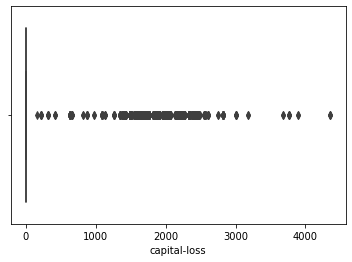

In [16]:
#scaling feature for capital gain and capital loss
sns.boxplot(x='capital-loss',data=joined_df)

<AxesSubplot:xlabel='capital-gain'>

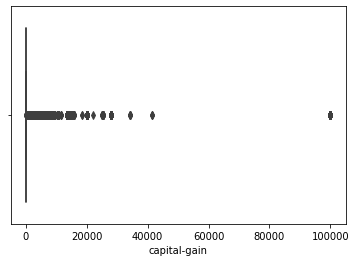

In [17]:
sns.boxplot(x='capital-gain',data=joined_df)

In [18]:
#transform data 
#joined_df['capital-loss'] = np.log1p(joined_df['capital-loss'])
#joined_df['capital-gain'] = np.log1p(joined_df['capital-gain'])

In [19]:
for col in non_categorical_columns : 
    print(col,joined_df[col].skew())

age 0.5575803166133182
fnlwgt 1.4388918785218416
education-num -0.3165248566607419
capital-gain 11.894658996587948
capital-loss 4.569808857738483
hours-per-week 0.23874965720275756


In [20]:
from sklearn.preprocessing import RobustScaler,PowerTransformer,StandardScaler,MaxAbsScaler
scaler = MaxAbsScaler()

In [21]:
scaled_columns = ['capital-loss','capital-gain']

In [22]:
for col in scaled_columns : 
    array_ = np.array(joined_df[col]).reshape(-1,1)
    array_ = scaler.fit_transform(array_)
    joined_df[col] = array_

In [23]:
for col in non_categorical_columns : 
    print(col,joined_df[col].skew())

age 0.5575803166133182
fnlwgt 1.4388918785218416
education-num -0.3165248566607419
capital-gain 11.894658996587948
capital-loss 4.569808857738486
hours-per-week 0.23874965720275756


In [24]:
#encoding categorical values :
joined_df.rename(columns={'class(target':'target'},inplace=True)
#mapping the target columns : 
joined_df['target']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: target, Length: 48842, dtype: object

In [25]:
joined_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [26]:
joined_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [31]:
column_to_encode = [x for x in joined_df.columns if x != 'target']

In [28]:
#encoding categorical values 
joined_df_encoded = pd.get_dummies(joined_df,drop_first=True)

In [30]:
joined_df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target_>50K
0,39,77516,13,0.021740,0.0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0.000000,0.0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0.000000,0.0,36,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16277,64,321403,9,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16278,38,374983,13,0.000000,0.0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16279,44,83891,13,0.054551,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
train.shape

(32561, 15)

In [44]:
#splitting dataset into train and test again : 
train_data = joined_df_encoded.iloc[:train.shape[0]]
test_data = joined_df_encoded.iloc[train.shape[0]:]

In [46]:
#checking the proportion of target class 
train_data['target_>50K'].value_counts()
#the class proportion 4 : 1 

0    24720
1     7841
Name: target_>50K, dtype: int64

In [48]:
x = train_data[[x for x in train_data.columns if x != 'target_>50K']]
y = train_data['target_>50K']

In [50]:
#meding scroll,
from sklearn.model_selection import train_test_split 
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3,random_state=42)


In [53]:
#implementing imbalanced learning treatment since the dataset is not equal in comparison 
from imblearn.over_sampling import SMOTE

In [54]:
oversampling = SMOTE()

In [56]:
y_train.value_counts()

0    17265
1     5527
Name: target_>50K, dtype: int64

In [55]:
x_resample,y_resample = oversampling.fit_resample(x_train,y_train)

In [58]:
y_resample.value_counts()

1    17265
0    17265
Name: target_>50K, dtype: int64

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [76]:

#trying all available algorithm 
from sklearn.linear_model import RidgeClassifier, LogisticRegression,SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#importing metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
list_of_algo = [RidgeClassifier, LogisticRegression,SGDClassifier,LinearDiscriminantAnalysis,SVC,NearestCentroid,GaussianNB,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier]

In [62]:
clf = RandomForestClassifier()
clf.fit(x_resample,y_resample)
y_pred = clf.predict(x_val)
print(accuracy_score(y_pred,y_val))

0.8463507011976661


In [63]:
clf = LogisticRegression()
clf.fit(x_resample,y_resample)
y_pred = clf.predict(x_val)
print(accuracy_score(y_pred,y_val))

0.4622786365032245


In [66]:
clf = ExtraTreesClassifier()
clf.fit(x_resample,y_resample)
y_pred = clf.predict(x_val)
print(accuracy_score(y_pred,y_val))

0.8304841846657796


In [79]:
#implementing cross validation 
from sklearn.model_selection import StratifiedKFold,cross_val_score
kfold = StratifiedKFold(n_splits=2)

In [ ]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_resample, y = y_resample, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")